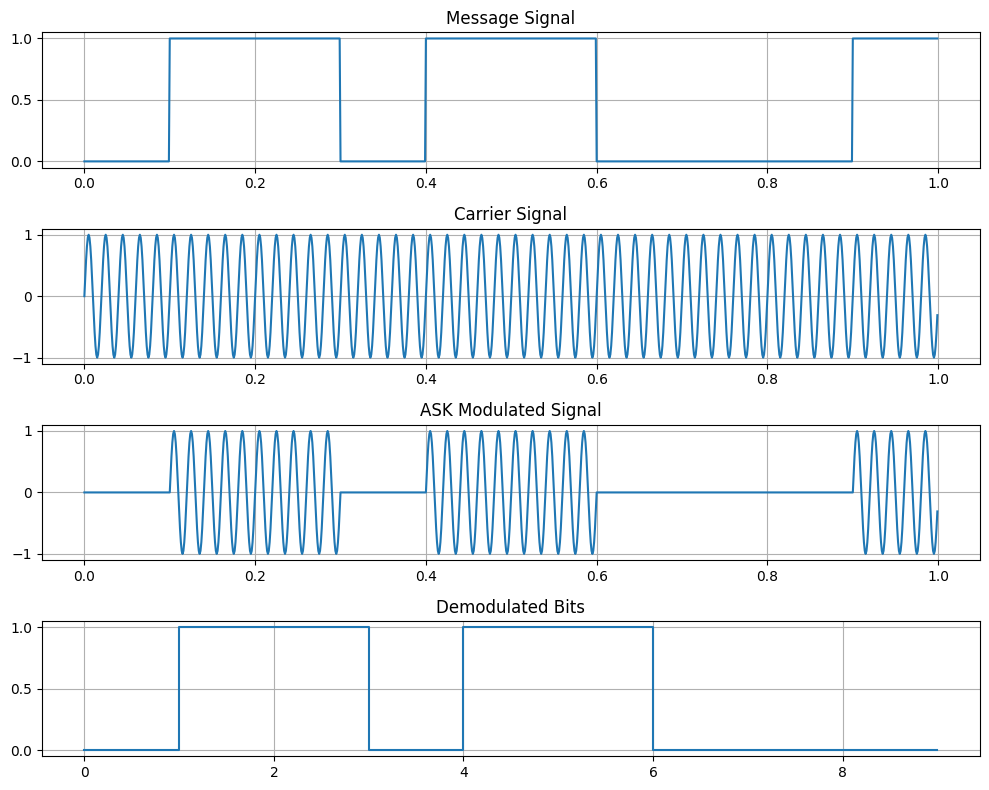

In [2]:
# ASK

#NAME: MAALINI B N

#REG NO: 212224060136

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter(order, cutoff/(0.5*fs), btype='low')
    return lfilter(b, a, data)

fs = 1000
f_carrier = 50
bit_rate = 10
T = 1

t = np.linspace(0, T, int(fs*T), endpoint=False)

bits = np.random.randint(0, 2, bit_rate)
bit_duration = fs // bit_rate
message_signal = np.repeat(bits, bit_duration)

carrier = np.sin(2*np.pi*f_carrier*t)

ask_signal = message_signal * carrier
demodulated = ask_signal * carrier
filtered_signal = butter_lowpass_filter(demodulated, f_carrier, fs)

decoded_bits = (filtered_signal[::bit_duration] > 0.25).astype(int)

plt.figure(figsize=(10,8))

plt.subplot(4,1,1)
plt.plot(t, message_signal)
plt.title("Message Signal")
plt.grid()

plt.subplot(4,1,2)
plt.plot(t, carrier)
plt.title("Carrier Signal")
plt.grid()

plt.subplot(4,1,3)
plt.plot(t, ask_signal)
plt.title("ASK Modulated Signal")
plt.grid()

plt.subplot(4,1,4)
plt.step(range(len(decoded_bits)), decoded_bits)
plt.title("Demodulated Bits")
plt.grid()

plt.tight_layout()
plt.show()
